bel(x0 = p0) =  0.25
bel(x0 = p1) =  0.25
bel(x0 = p2) =  0.25
bel(x0 = p3) =  0.25
(x1 = p0|u1,x0=p0, x0=p1,x0=p2, x0=p3)=  [0.3, 0, 0, 0]
(x1 = p1|u1,x0=p0, x0=p1,x0=p2, x0=p3)=  [0.7, 0.3, 0, 0]
(x1 = p2|u1,x0=p0, x0=p1,x0=p2, x0=p3)=  [0.0, 0.7, 0.3, 0]
(x1 = p3|u1,x0=p0, x0=p1,x0=p2, x0=p3)=  [0, 0.0, 0.7, 0.3]
bel_bar(x1=p0)=  0.075
bel_bar(x1=p1)=  0.25
bel_bar(x1=p2)=  0.25
bel_bar(x1=p3)=  0.25
p(z1 = door|x1=p0)= 0.3
p(z1 = door|x1=p1)= 0.8
p(z1 = door|x1=p2)= 0.3
p(z1 = door|x1=p3)= 0.8
bel(x1 = p0) = p(z1 = door|x1=p0)*bel_bar(x1 = p0)*eta = 0.022*eta
bel(x1 = p1) = p(z1 = door|x1=p1)*bel_bar(x1 = p1)*eta = 0.2*eta
bel(x1 = p2) = p(z1 = door|x1=p2)*bel_bar(x1 = p2)*eta = 0.075*eta
bel(x1 = p3) = p(z1 = door|x1=p3)*bel_bar(x1 = p3)*eta = 0.2*eta
eta = 1/0.497 =  2.01
bel(x1 = p0) =  0.045
bel(x1 = p1) =  0.402
bel(x1 = p2) =  0.151
bel(x1 = p3) =  0.402


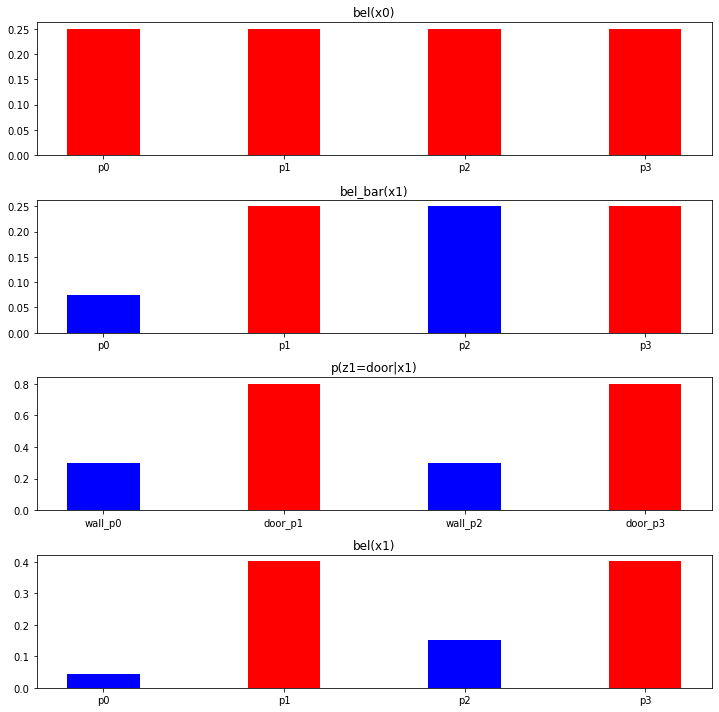

(x2 = p0|u2,x1=p0, x1=p1,x1=p2, x1=p3)=  [0.3, 0, 0, 0]
(x2 = p1|u2,x1=p0, x1=p1,x1=p2, x1=p3)=  [0.7, 0.3, 0, 0]
(x2 = p2|u2,x1=p0, x1=p1,x1=p2, x1=p3)=  [0.0, 0.7, 0.3, 0]
(x2 = p3|u2,x1=p0, x1=p1,x1=p2, x1=p3)=  [0, 0.0, 0.7, 0.3]
bel_bar(x2=p0)=  0.014
bel_bar(x2=p1)=  0.152
bel_bar(x2=p2)=  0.327
bel_bar(x2=p3)=  0.226
p(z2 = wall|x2=p0)= 0.7
p(z2 = wall|x2=p1)= 0.2
p(z2 = wall|x2=p2)= 0.7
p(z2 = wall|x2=p3)= 0.2
bel(x2 = p0) = p(z2 = wall|x2=p0)*bel_bar(x2 = p0)*eta = 0.009*eta
bel(x2 = p1) = p(z2 = wall|x2=p1)*bel_bar(x2 = p1)*eta = 0.03*eta
bel(x2 = p2) = p(z2 = wall|x2=p2)*bel_bar(x2 = p2)*eta = 0.229*eta
bel(x2 = p3) = p(z2 = wall|x2=p3)*bel_bar(x2 = p3)*eta = 0.045*eta
eta = 1/0.314 =  3.187
bel(x2 = p0) =  0.03
bel(x2 = p1) =  0.097
bel(x2 = p2) =  0.729
bel(x2 = p3) =  0.144


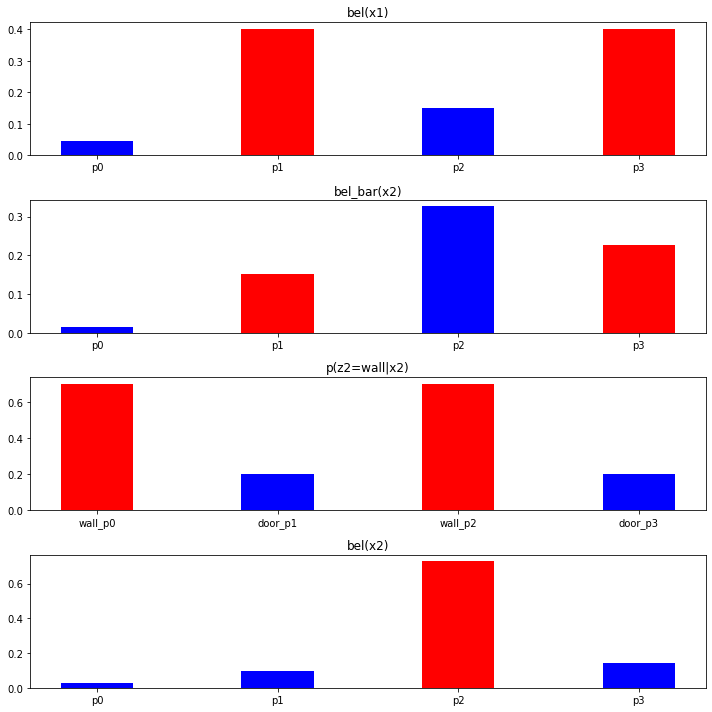

In [19]:
import pandas as pd
import operator
import matplotlib.pyplot as plt

def plot_color(dict1):
#     print(dict1)
    max_val=max(dict1.items(), key=operator.itemgetter(1))
#     print(max_val)
    color=[]
    for key in dict1:
        if dict1[key] < max_val[1]:
            color.append('b')
        else:
            color.append('r')
    return color
        
def merge_dict(dict1,dict2):
    return(dict2.update(dict1))

def bayes_filter(bel_x, z,step):
    #bel_x=x
    if step==0:
        for key in bel_x:
            print(f"bel(x{step} = {key}) = ", round(bel_x[key],3))
#     else:
#         for key in bel_x:
#             print(f"bel(x{step} = {key}) = ", round(bel_x[key],3))
    nplt=4
    plt.figure(figsize=(10,10))
    plt.subplot(nplt,1,1)
    w=0.4
    h=10
    plt.title(f"bel(x{step})")
    plt.bar(*zip(*bel_x.items()),color=plot_color(bel_x),width=w)
    first_grid=.7
    same_grid=.3
    second_grid=0.0
    yellow_grid=0.0
    state_trans_prob={f"x{step+1} = p0":[same_grid,0,0,0],f"x{step+1} = p1":[first_grid,same_grid,0,0],
                      f"x{step+1} = p2":[second_grid,first_grid,same_grid,0],f"x{step+1} = p3":[0,second_grid,first_grid,same_grid]}
    for key in state_trans_prob:
        print(f"({key}|u{step+1},x{step}=p0, x{step}=p1,x{step}=p2, x{step}=p3)= ",state_trans_prob[key])
        
    door=['p1','p3']
    wall=['p0','p2']
    door_sense={"wall_p0":.3,"door_p1":.8,"wall_p2":.3,"door_p3":.8}
    wall_sense={"wall_p0":.7,"door_p1":.2,"wall_p2":.7,"door_p3":.2}
    #print(bel_x)
    bel_vals=bel_x.values()
    bel_bar={}
    for key in state_trans_prob:
        bel_bar[key[-2:]]=sum([bel*prob for bel,prob in zip(bel_vals,state_trans_prob[key])])
        print(f"bel_bar(x{step+1}={key[-2:]})= ",round(bel_bar[key[-2:]],3))
   #bel_bar={"p0":bel_bar_x_p0,"p1":bel_bar_x_p1,"p2":bel_bar_x_p2,"p3":bel_bar_x_p3}
    plt.subplot(nplt,1,2)
    plt.title(f"bel_bar(x{step+1})")
    plt.bar(*zip(*bel_bar.items()),color=plot_color(door_sense),width=w)

    sum_bel=[]
    
    if z == "door":
        #print("If Measurement: ", z)
        plt.subplot(nplt,1,3)
        plt.title(f"p(z{step+1}={z}|x{step+1})")
        plt.bar(*zip(*door_sense.items()),color=plot_color(door_sense),width=w)
        for key in door_sense:
            print(f"p(z{step+1} = {z}|x{step+1}={key[-2:]})=", door_sense[key])
        for key in bel_bar:
            
            if key in door:
                #print("if door: ",key)
                sum_bel.append(bel_bar[key]*.80)
                bel_bar[key]*=.80
                
                
                
            else:
                #print("else door: ",key)
                sum_bel.append(bel_bar[key]*.30)
                bel_bar[key]*=.30
                
                
                
    else:
        plt.subplot(nplt,1,3)
        plt.title(f"p(z{step+1}={z}|x{step+1})")
        plt.bar(*zip(*wall_sense.items()),color=plot_color(wall_sense),width=w)
        #print("Else Measurement: ", z)
        for key in wall_sense:
            print(f"p(z{step+1} = {z}|x{step+1}={key[-2:]})=", wall_sense[key])
        for key in bel_bar:
            
            if key in wall:
                #print("if wall: ",key)
                sum_bel.append(bel_bar[key]*.70)
                bel_bar[key]*=.70
               
                
            else:
                #print("else wall: ",key)
                sum_bel.append(bel_bar[key]*.20)
                bel_bar[key]*=.20
               
    
    for i in range(len(sum_bel)):
        print(f"bel(x{step+1} = p{i}) = p(z{step+1} = {z}|x{step+1}=p{i})*bel_bar(x{step+1} = p{i})*eta = {round(sum_bel[i],3)}*eta")
                
    eta=1/sum(sum_bel)
    print(f"eta = 1/{round(sum(sum_bel),3)} = ", round(eta,3))
    eta_dict={"eta":eta}
    step_dict={"step":step+1}
#     print("eta: ", eta)

   
    new_bel={key:bel_bar[key]*eta for key in bel_x}
    #print(new_bel)
    
    for key in new_bel:
        print(f'bel(x{step+1} = {key}) = ', round(new_bel[key],3))
        
    plt.subplot(nplt,1,4)
    plt.title(f"bel(x{step+1})")
    plt.bar(*zip(*new_bel.items()),color=plot_color(new_bel),width=w)
    plt.tight_layout()
    plt.show()
   
    if z=="door":
        df=pd.DataFrame.from_dict([bel_x,step_dict,state_trans_prob,bel_bar,eta_dict,new_bel,door_sense])
        
        return new_bel,df#,state_trans_prob,bel_bar,eta_dict,step_dict,new_bel,door_sense
    else:
        
        
        df=pd.DataFrame.from_dict([bel_x,step_dict,state_trans_prob,bel_bar,eta_dict,new_bel,wall_sense])
        
        return new_bel,df

sense=["door","wall"]
bel_x=[{"p0":0.25,"p1":0.25,"p2":0.25,"p3":0.25}]
#state_trans_prob,bel_bar,eta_dict,step_dict,new_bel,sense=0

dfs=[]
for step in range(2):
    bel,new_df=bayes_filter(bel_x[step],sense[step],step)
    bel_x.append(bel)
    dfs.append(new_df)
#df=pd.DataFrame(dict_list)
#df